In [29]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf
import sys
from IPython.display import Image


In [3]:
#Has the correct axs ids
statsid = pd.read_csv('stats/statsall.csv')

In [4]:
pd.set_option('display.max_columns', None)
statsid.head()
11436002033146

,Unnamed: 0,Unnamed: 0.1,aic_flare,aic_gauss,axs_id,chi_flare,chi_gauss,dec,dof_flare,dof_gauss,end_time,equivdur,exp_comp,fl_indx,flare_end_diff,flare_time,id,match_file,perc_comp,ra,red_flare,red_gauss,xpos,ypos
0,0,NaN,26.129841,24.178906,11436002033146,18.129841,16.178906,-5.148791,24,24,58348.327107,336.704237,3.770160e-01,[194 195 196 197],0.005984,58348.317905,33146,ztf_000436_zr_c01_q1_match_programid,-1.950935,287.395600,0.755410,0.674121,2269.170,1695.843
1,1,NaN,28.902510,140.081032,11436002034396,20.902510,132.081033,-5.168910,24,24,58348.327107,521.383704,1.387105e+24,[198 199 200 201],0.011042,58348.313773,34396,ztf_000436_zr_c01_q1_match_programid,111.178522,287.760676,0.870938,5.503376,977.702,1768.901
2,2,NaN,56.146742,25.443606,11436002065253,48.146742,17.443606,-4.935116,32,32,58348.327107,360.905425,2.152280e-07,[63 64 65 66 67],1.016944,58347.306482,65253,ztf_000436_zr_c01_q1_match_programid,-30.703136,287.700827,1.504586,0.545113,1194.142,1184.821
3,3,NaN,25.032322,16.724297,11436002067219,17.032322,8.724297,-4.981991,21,21,58348.327107,178.007940,1.570128e-02,[28 29 30],1.051389,58347.273877,67219,ztf_000436_zr_c01_q1_match_programid,-8.308026,287.422084,0.811063,0.415443,2178.840,1361.822
4,4,NaN,44.068456,29.858588,11436002098283,36.068456,21.858588,-4.972078,31,31,58348.327107,698.951073,8.210438e-04,[109 110 111 112],0.086412,58348.238391,98283,ztf_000436_zr_c01_q1_match_programid,-14.209868,287.597438,1.163499,0.705116,1551.066,1086.980


In [5]:
#Reading in Gaia
df_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_436.h5','table')
df_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_437.h5','table')
df_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_488.h5','table')
df_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_489.h5','table')
df_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_538.h5','table')
df_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_539.h5','table')
df_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_540.h5','table')
df_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_541.h5','table')
df_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_591.h5','table')
df_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_592.h5','table')
df_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_638.h5','table')
df_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_639.h5','table')
df_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_685.h5','table')
df_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_686.h5','table')

In [6]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)
    
df_xmatch['unique_matchids_exploded'] = df_xmatch['unique_matchids_exploded'].astype(int)

In [7]:
df_xmatch.head()

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,4260126628669270656,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44,0,10435322156518
1,10435322080496,280.676259,-1.647395,4260126628669245952,2.242176,20.573723,73.060173,20.919231,18.677055,NaN,-0.793990,1.051409,NaN,5.051085e-07,2,0,10435322080496
2,10435322142211,280.676404,-1.642892,4260126830543756544,2.869312,20.581446,79.545486,21.304731,18.435419,NaN,-1.044307,1.244409,NaN,2.341685e-06,7,0,10435322142211
3,10435322042113,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,0,10435322042113
4,10435322042113,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,1,10435321063996


In [67]:
df_xmatch['unique_matchids_exploded']

0          10435322156518
1          10435322080496
2          10435322142211
3          10435322042113
4          10435321063996
5          10435322142026
6          10435322169481
7          10435321063851
8          10435322041693
9          10435321050196
10         10435322116342
11         10435322042134
12         10435322116649
13         10435321030787
14         10435322156462
15         10435321063969
16         10435322042028
17         10435322041467
18         10435321050199
19         10435322080458
20         10435321030895
21         10435322080165
22         10435322080439
23         10435322041539
24         10435321030566
25         10435322080616
26         10435322041470
27         10435322041610
28         10435321030623
29         10435322041721
                ...      
5618042    10687472110039
5618043    10687472032474
5618044    10687471023859
5618045    11728152016374
5618046    10687472031897
5618047    10687471023454
5618048    11728152015895
5618049    1

In [84]:
field687 = df_xmatch.loc[(df_xmatch['unique_matchids_exploded'] > 10687000000000) & 
                         (df_xmatch['unique_matchids_exploded'] < 10689000000000)]

field686 = df_xmatch.loc[(df_xmatch['unique_matchids_exploded'] > 10686000000000) & 
                         (df_xmatch['unique_matchids_exploded'] < 10687000000000)]

fieldhigh = df_xmatch.loc[(df_xmatch['unique_matchids_exploded'] > 10687000000000)]
fieldlow = df_xmatch.loc[(df_xmatch['unique_matchids_exploded'] < 10687000000000)]


(282.5, 308)

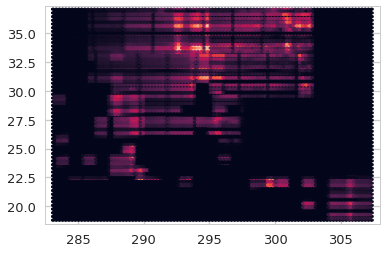

In [89]:
plt.hexbin(fieldhigh['ra'],fieldhigh['dec'])
plt.ylim(18.5,37.3)
plt.xlim(282.5,308)

(282.5, 308)

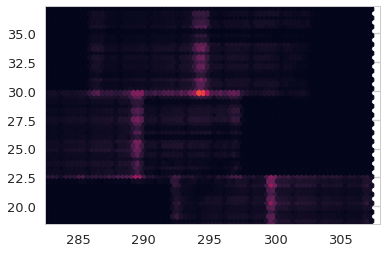

In [90]:
plt.hexbin(fieldlow['ra'],fieldlow['dec'])
plt.ylim(18.5,37.3)
plt.xlim(282.5,308)

(293.5, 303)

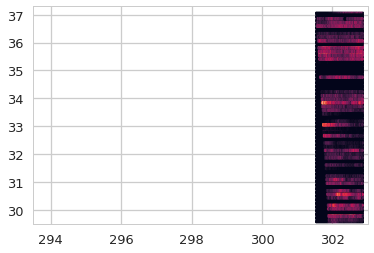

In [79]:
plt.hexbin(field687['ra'],field687['dec'])

plt.ylim(29.5,37.3)
plt.xlim(293.5,303)

(293.5, 303)

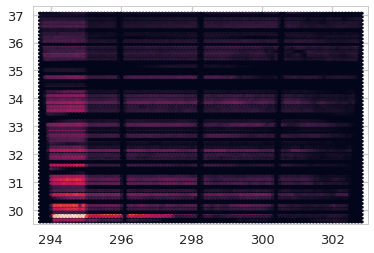

In [80]:
plt.hexbin(field686['ra'],field686['dec'])

plt.ylim(29.5,37.3)
plt.xlim(293.5,303)

(array([  663445.,        0.,        0., 11383344.,   238711.,        0.,
               0., 14015479.,        0.,        0.,        0., 20073478.,
               0.,        0.,        0.,  9513260.,        0.,        0.,
         8046567.,   617660.,        0.,        0.,  7538195.,        0.,
               0.,    97046.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0

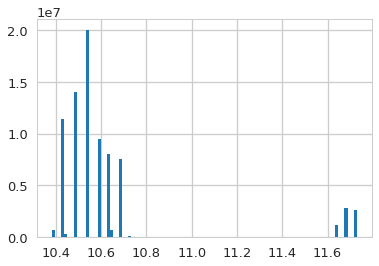

In [65]:
plt.hist(df_xmatch['unique_matchids_exploded']/1000000000000, bins=np.arange(10.3,))

(array([  532300.,        0.,        0., 11341417.,   298538.,        0.,
               0., 13995613.,        0.,        0.,        0., 19914753.,
               0.,        0.,        0.,  9617913.,        0.,        0.,
         7279271.,   715720.,        0.,        0.,  7732180.,        0.,
               0.,   149726.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0

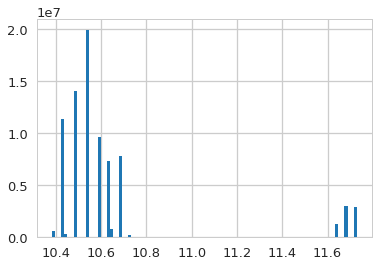

In [66]:
plt.hist(df_xmatch['matchid']/1000000000000, bins=100)

In [8]:
#read in green xmatch
df_g19_xmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=436')
df_g19_xmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=437')
df_g19_xmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=488')
df_g19_xmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=489')
df_g19_xmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=538')
df_g19_xmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=539')
df_g19_xmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=540')
df_g19_xmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=541')
df_g19_xmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=591')
df_g19_xmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=592')
df_g19_xmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=638')
df_g19_xmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=639')
df_g19_xmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=685')
df_g19_xmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=686')

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00000-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00005-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00008-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00004-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00002-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00007-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00009-4de02dc7-cb24-41fd-910d-53cc13fb3a23-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00000-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00005-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00004-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00007-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00008-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00002-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00009-c30c1625-e12d-43d9-b295-b0eb490f7973-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00000-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00001-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00004-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00005-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00007-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00012-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00018-9a80bcfa-fd52-4434-8f52-7a99a5859406-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00000-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00005-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00004-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00001-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00007-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00012-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00014-c5d6a17c-fb14-45ef-8b21-091653d2af21-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00000-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00003-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00011-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00001-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00010-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00008-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00013-96e7689b-7a9b-4f04-be3a-5aad77503b07-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00000-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00003-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00001-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00011-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00010-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00008-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00013-37dc25cb-2356-4056-bc1a-f3899dcd007f-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00000-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00003-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00001-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00010-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00011-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00008-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00013-fc560f0c-0bbe-46aa-89e3-4ce639a30311-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00000-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00003-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00001-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00010-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00013-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00011-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00008-4e69f560-ddc7-4c55-b54c-e7229ee56a44-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00009-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00005-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00004-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00001-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00000-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00015-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00012-c209dc87-3116-442a-9c86-b026da5f2c12-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00000-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00005-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00009-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00004-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00001-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00008-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00012-0efcb99e-e685-4adc-82a5-b7463900795f-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00000-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00003-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00005-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00001-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00013-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00009-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00010-81ceaeec-44d2-4bd1-84c7-9548cefe7252-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00000-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00003-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00001-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00005-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00013-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00014-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00009-4599b60f-c17d-43bc-bf93-5738df38856f-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00004-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00005-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00000-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00001-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00007-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00006-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00008-a32809f5-d912-477a-8df8-2953c9bd8cf5-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00000-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00005-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00004-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00001-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00007-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00008-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00006-cb529dbe-9fba-43db-b4a3-3fc23ead8209-c000.snappy.parquet.crc

In [9]:
g19_xmatch = [df_g19_xmatch436, df_g19_xmatch437,df_g19_xmatch488,df_g19_xmatch489,df_g19_xmatch538,df_g19_xmatch539,
              df_g19_xmatch540,df_g19_xmatch541,df_g19_xmatch591,df_g19_xmatch592,df_g19_xmatch638,df_g19_xmatch639,
              df_g19_xmatch685,df_g19_xmatch686]

df_g19_xmatch = pd.DataFrame()
for i in g19_xmatch:
    df_g19_xmatch = df_g19_xmatch.append(i)

In [10]:
df_g19_xmatch.head()

,matchid,ra,dec,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.70,14.036073,1.137076,2.75,-0.45,15.117517,1.239276,3.824185,-0.20,4260126628669270656
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.60,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080
2,10435322142026,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.70,13.720051,1.478382,2.90,-0.40,15.170022,1.584317,3.950000,-0.20,4260126937906960640
3,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.60,11.417916,0.800902,3.35,-0.40,11.788458,0.837992,3.500000,-0.15,4260126933620555136
4,10435322116342,280.678074,-1.635666,13.293195,2.027949,-0.450000,-0.65,13.726082,2.067841,0.15,-0.45,14.420890,2.099801,0.500000,-0.25,0


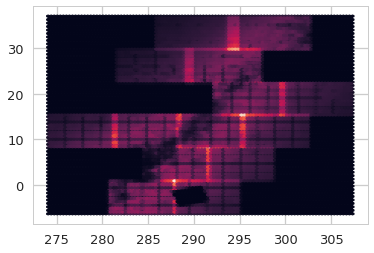

In [51]:
plt.hexbin(df_g19_xmatch['ra'],df_g19_xmatch['dec'])

In [58]:
print(len(df_g19_xmatch),len(df_idxmatch), len(tran))

102842952 88290120 7818676


In [54]:
tran = df_idxmatch.loc[df_idxmatch['matchid'] > 11000000000000]

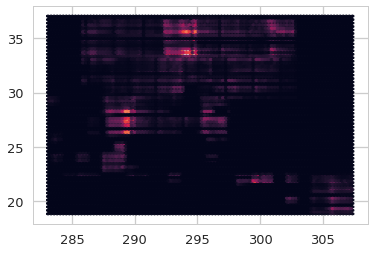

In [57]:
plt.hexbin(tran['ra'],tran['dec'])


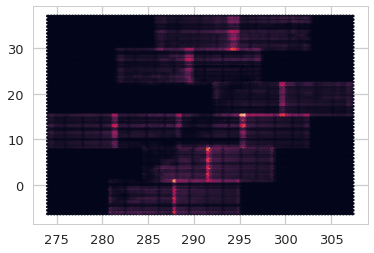

In [59]:
plt.hexbin(df_idxmatch['ra'],df_idxmatch['dec'])


In [11]:
#Reading in ID mapping
df_idxmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_436.h5','table')
df_idxmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_437.h5','table')
df_idxmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_488.h5','table')
df_idxmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_489.h5','table')
df_idxmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_538.h5','table')
df_idxmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_539.h5','table')
df_idxmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_540.h5','table')
df_idxmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_541.h5','table')
df_idxmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_591.h5','table')
df_idxmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_592.h5','table')
df_idxmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_638.h5','table')
df_idxmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_639.h5','table')
df_idxmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_685.h5','table')
df_idxmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_686.h5','table')

In [12]:
idxmatch = [df_idxmatch436,df_idxmatch437,df_idxmatch488,df_idxmatch489,df_idxmatch538,df_idxmatch539,
            df_idxmatch540,df_idxmatch541,df_idxmatch591,df_idxmatch592,df_idxmatch638,df_idxmatch639,
            df_idxmatch685,df_idxmatch686]

df_idxmatch = pd.DataFrame()
for i in idxmatch:
    df_idxmatch = df_idxmatch.append(i)

In [13]:
df_idxmatch['unique_matchids_exploded'] = df_idxmatch['unique_matchids_exploded'].astype(int)

In [14]:
df_idxmatch.head()

,matchid,ra,dec,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322116782,280.675461,-1.646806,0,10435322116782
1,10435322156518,280.676054,-1.643882,0,10435322156518
2,10435322080496,280.676259,-1.647395,0,10435322080496
3,10435322142211,280.676404,-1.642892,0,10435322142211
4,10435322042113,280.676568,-1.648677,0,10435322042113


In [100]:
ids = str(df_idxmatch['unique_matchids_exploded'].values[0])
feild = ids[1:5]
ids

'10435322116782'

In [101]:
feild

'0435'

In [103]:
fields = []
for i in range(len(df_idxmatch['unique_matchids_exploded'])):
    ids = str(df_idxmatch['unique_matchids_exploded'].values[i])
    field = ids[1:5]
    fields.append(field)


In [104]:
fields

['0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 '0435',
 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 <a list of 54 Text xticklabel objects>)

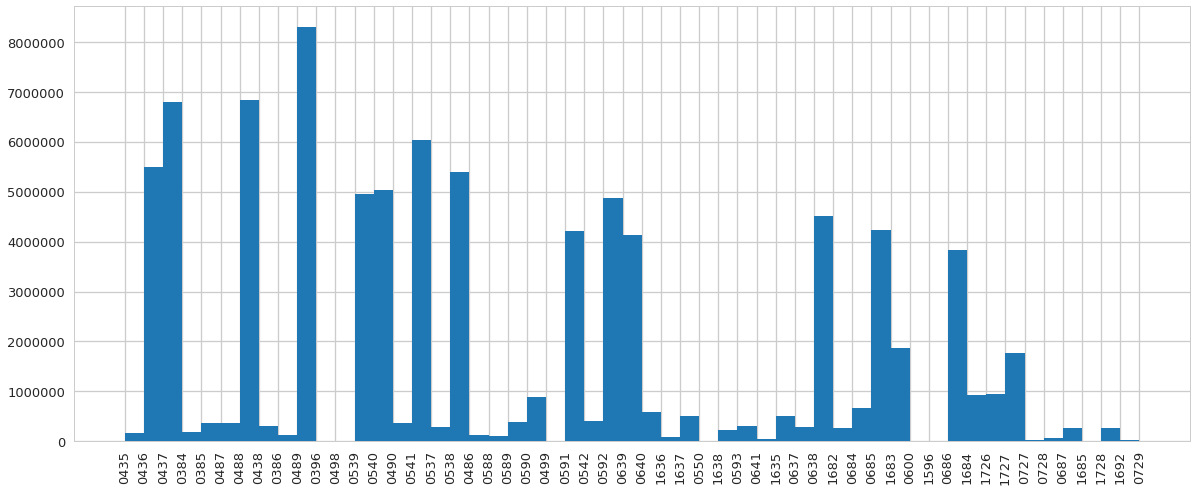

In [109]:
fig = plt.figure(figsize=(20,8))

plt.hist(fields, bins=53)
plt.xticks(rotation='vertical')


In [117]:
highcadence = df_idxmatch.loc[((df_idxmatch['unique_matchids_exploded'] > 10436000000000) & (df_idxmatch['unique_matchids_exploded'] < 10438000000000)) |
                              ((df_idxmatch['unique_matchids_exploded'] > 10488000000000) & (df_idxmatch['unique_matchids_exploded'] < 10490000000000)) |
                              ((df_idxmatch['unique_matchids_exploded'] > 10538000000000) & (df_idxmatch['unique_matchids_exploded'] < 10542000000000)) |
                              ((df_idxmatch['unique_matchids_exploded'] > 10591000000000) & (df_idxmatch['unique_matchids_exploded'] < 10593000000000)) |
                              ((df_idxmatch['unique_matchids_exploded'] > 10638000000000) & (df_idxmatch['unique_matchids_exploded'] < 10640000000000)) |
                              ((df_idxmatch['unique_matchids_exploded'] > 10685000000000) & (df_idxmatch['unique_matchids_exploded'] < 10687000000000))
                              ]


In [118]:
overlap = df_idxmatch.loc[(df_idxmatch['unique_matchids_exploded'] < 10436000000000) |
                          ((df_idxmatch['unique_matchids_exploded'] > 10438000000000) & (df_idxmatch['unique_matchids_exploded'] < 10488000000000)) |
                          ((df_idxmatch['unique_matchids_exploded'] > 10490000000000) & (df_idxmatch['unique_matchids_exploded'] < 10538000000000)) | 
                          ((df_idxmatch['unique_matchids_exploded'] > 10542000000000) & (df_idxmatch['unique_matchids_exploded'] < 10591000000000)) |
                          ((df_idxmatch['unique_matchids_exploded'] > 10593000000000) & (df_idxmatch['unique_matchids_exploded'] < 10638000000000)) | 
                          ((df_idxmatch['unique_matchids_exploded'] > 10640000000000) & (df_idxmatch['unique_matchids_exploded'] < 10685000000000)) | 
                          (df_idxmatch['unique_matchids_exploded'] > 10687000000000)
                          ]

In [121]:
print(len(highcadence),len(overlap),len(df_idxmatch), len(highcadence)+len(overlap))

74607393 13682727 88290120 88290120


(270, 310)

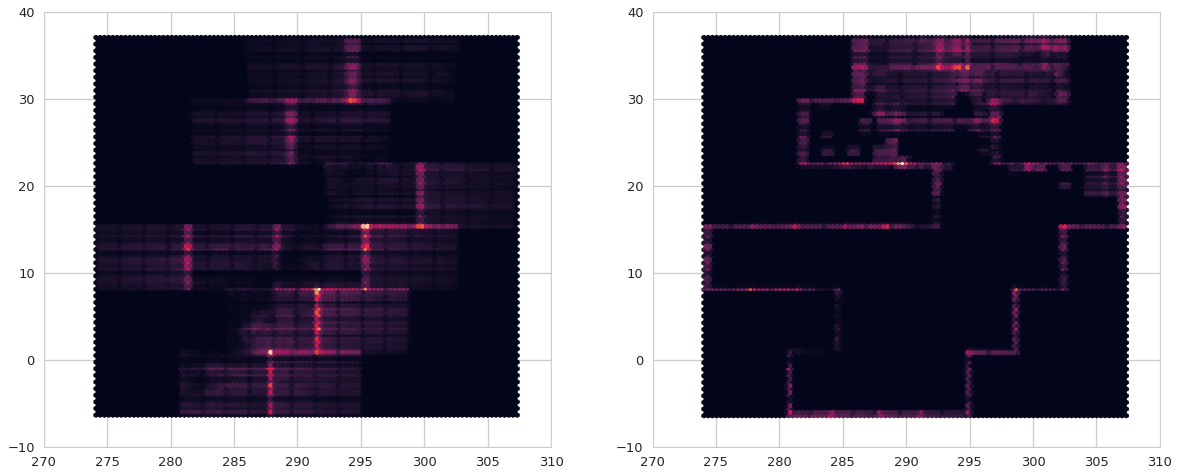

In [125]:
fig = plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.hexbin(highcadence['ra'],highcadence['dec'])
plt.ylim(-10,40)
plt.xlim(270,310)


plt.subplot(1, 2, 2)
plt.hexbin(overlap['ra'],overlap['dec'])
plt.ylim(-10,40)
plt.xlim(270,310)

The first graph shows the ra and dec for each source produced in the ID cross match. The querys done in AXS are done by RA and Dec, not by field number. Since the fields overlap slighly, there are unique_matchids that are from fields other than our high cadence fields. The right graph shows the RA and Dec of the fields that are overlaping the high cadence fields. 

In [126]:
matchids = pd.merge(highcadence, overlap, how='outer', on='matchid')

In [128]:
inoverlaponly = matchids[matchids['unique_matchids_exploded_x'].isnull()]
inhighcadenceonly = matchids[matchids['unique_matchids_exploded_y'].isnull()]

In [129]:
print(len(matchids),len(inoverlaponly),len(inhighcadenceonly))

89884440 3183040 61433143


(270, 310)

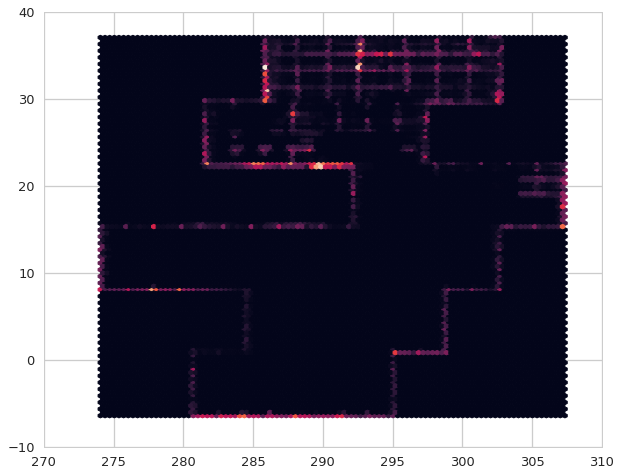

In [133]:
fig = plt.figure(figsize=(10,8))

plt.hexbin(inoverlaponly['ra_y'],inoverlaponly['dec_y'])
plt.ylim(-10,40)
plt.xlim(270,310)

The different unique_matchids can correspond to the same source, so the matchid is the one unique id for each source. I connected the highcadence sources and overlap source by the matchid. Doing this enables us to see which overlap sources correspond to which highcadence sources. The graph above show sources in the overlap that do not correspond to any highcadence sources.

(270, 310)

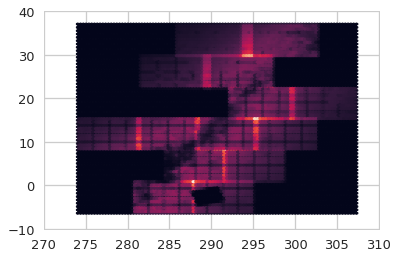

In [124]:
plt.hexbin(inoverlaponly['ra'],inoverlaponly['dec'])
plt.ylim(-10,40)
plt.xlim(270,310)

Green does not have the uniquq_matchids so so here we combine the two dataframes on 'matchid'. This was unfortunately not one to one. Maybe makes sense that there are extra IDs because maybe not every source had a corresponding Green source. But it is wierd that there are some extra green sources. Maybe some of the green sources are transients

In [142]:
df_g19_id = pd.merge(df_g19_xmatch, df_idxmatch, how='outer', left_on='matchid', right_on='matchid')

In [212]:
df_g19_id_sources = df_g19_id[df_g19_id['matchid'] < 10000000000000]

In [213]:
missing_green = df_g19_id_sources[df_g19_id_sources['ra_x'].isnull()]
missing_ids = df_g19_id_sources[df_g19_id_sources['unique_matchids_exploded'].isnull()]

In [214]:
print(len(missing_green),len(missing_ids))

1146900 6973753


In [205]:
missing_ids

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,exploded_unique_matchids_index,unique_matchids_exploded
5571054,10435031116194,280.675615,-6.004487,11.989958,0.542480,2.600000,-0.500000,12.750618,0.638088,4.250,-0.30,14.705505,0.724516,5.450000,-1.258150e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571055,10435032021914,280.675694,-6.010549,11.789409,0.392451,2.150000,-0.550000,12.539946,0.470105,2.775,-0.30,13.359179,0.570878,3.274185,-1.000000e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571056,10435032021334,280.676213,-6.000424,12.083836,0.515819,3.050000,-0.550000,13.957186,0.874410,3.875,-0.35,14.901164,0.992271,6.924185,-1.000000e-01,0.000000e+00,NaN,NaN,NaN,NaN
5571057,10435032136184,280.676302,-6.015657,11.259315,0.663292,2.100000,-0.550000,12.356569,0.739192,3.925,-0.30,14.605457,0.826299,5.500000,-1.000000e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571058,10435032062949,280.676373,-6.012543,13.786939,0.333180,1.575815,-0.650000,14.522902,0.398974,2.275,-0.40,15.383622,0.472345,2.850000,-2.000000e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571059,10435032103143,280.677013,-6.007594,13.054298,0.277106,1.300000,-0.550000,14.153122,0.356070,2.100,-0.35,15.115016,0.449187,2.924185,-1.258150e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571060,10435032021361,280.677152,-6.000859,11.947883,0.157277,3.250000,-0.550000,13.042769,0.747804,5.525,-0.30,14.804210,0.933957,8.150000,-1.000000e-01,0.000000e+00,NaN,NaN,NaN,NaN
5571061,10435032102947,280.677338,-6.002040,12.162024,0.473054,3.100000,-0.550000,13.884289,0.996097,3.775,-0.35,14.866088,1.112945,7.074185,-1.000000e-01,0.000000e+00,NaN,NaN,NaN,NaN
5571062,10435032062549,280.677383,-6.003371,13.759079,0.546315,1.800000,-0.600000,14.422515,0.609069,2.425,-0.40,15.225457,0.693484,2.924185,-2.000000e-01,4.253426e+18,NaN,NaN,NaN,NaN
5571063,10435031129472,280.677516,-6.006004,12.492816,0.582155,2.800000,-0.550000,13.412207,0.674515,3.400,-0.35,14.345697,0.753057,4.500000,-1.500000e-01,4.253426e+18,NaN,NaN,NaN,NaN


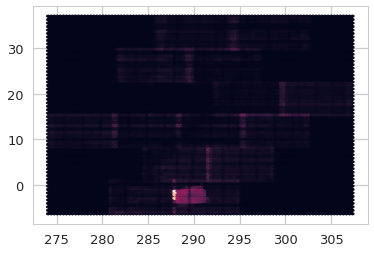

In [206]:
plt.hexbin(missing_green['ra_y'],missing_green['dec_y'])

(270, 310)

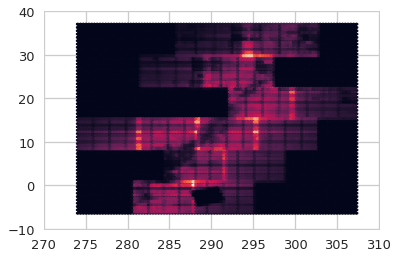

In [209]:
plt.hexbin(missing_ids['ra_x'],missing_ids['dec_x'])
plt.ylim(-10,40)
plt.xlim(270,310)

(270, 310)

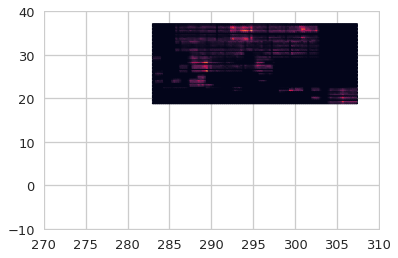

In [215]:
plt.hexbin(missing_green['ra_y'],missing_green['dec_y'])
plt.ylim(-10,40)
plt.xlim(270,310)

(270, 310)

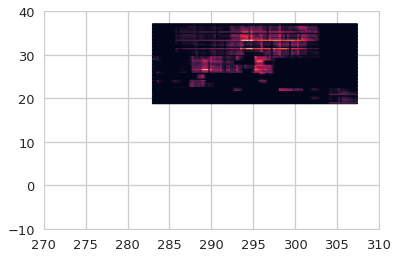

In [216]:
plt.hexbin(missing_ids['ra_x'],missing_ids['dec_x'])
plt.ylim(-10,40)
plt.xlim(270,310)

# Playing with Green19

* For combining the Gaia and Green dataframes, there are more matches when you combine {on='matchid'} rather than {left_on='matchid', right_on='unique_matchids_exploded'}
* The 16th, 50th and 84th percentiles are shown in the Green data 

In [74]:
print(len(df_g19_stats),len(df_g19_xmatch),len(statsid))
print(len(statsid)-len(df_g19_stats))

11074 102842952 24842
13768


In [107]:
#Connecting G19 with all ZTF
#connets based on matchid
#only keeps ones that are on both sides

df_gg_gaiamatch_in = pd.merge(df_g19_xmatch, df_xmatch, how='inner', on='matchid')

In [12]:
#Connecting G19 with all ZTF
#matches on matchid
#keeps all info
#df_gg_gaiamatch_out = pd.merge(df_g19_xmatch, df_full, how='outer', on='matchid')

In [108]:
pd.set_option('display.max_columns', None)

df_gg_gaiamatch_in.head()

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.7,14.036073,1.137076,2.75,-0.45,15.117517,1.239276,3.824185,-0.20,4260126628669270656,280.676054,-1.643882,4260126628669270656,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44,0,10435322156518
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,0,10435322042113
2,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,1,10435321063996
3,10435322142026,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.7,13.720051,1.478382,2.90,-0.40,15.170022,1.584317,3.950000,-0.20,4260126937906960640,280.677176,-1.635635,4260126937906960640,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21,0,10435322142026
4,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.6,11.417916,0.800902,3.35,-0.40,11.788458,0.837992,3.500000,-0.15,4260126933620555136,280.678004,-1.640589,4260126933620555136,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145,0,10435321063851


Inner connetions based on the gaia source gaia. There are 573 flares but only 336 of them match with Green19

In [54]:
#Connecting G19 with all stats
#Need to find best way to connet G19 and Stats

df_gg_stats = pd.merge(df_g19_xmatch, df_xmatch, how='outer', left_on='gaia_id', right_on='source_id')
df_gg_stats

,matchid_x,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,matchid_y,ra_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,1.043532e+13,280.676054,-1.643882,12.614978,1.050425,1.875815e+00,-0.700000,14.036073,1.137076,2.750,-0.450,15.117517,1.239276,3.824185,-2.000000e-01,4.260127e+18,1.043532e+13,280.676054,-1.643882,4.260127e+18,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44.0,0.0,1.043532e+13
1,1.043532e+13,280.676568,-1.648677,11.017821,1.039677,2.925815e+00,-0.600000,11.827391,1.164479,4.100,-0.350,13.269290,1.274188,5.374185,-1.500000e-01,4.260127e+18,1.043532e+13,280.676568,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,0.0,1.043532e+13
2,1.043532e+13,280.676568,-1.648677,11.017821,1.039677,2.925815e+00,-0.600000,11.827391,1.164479,4.100,-0.350,13.269290,1.274188,5.374185,-1.500000e-01,4.260127e+18,1.043532e+13,280.676568,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,1.0,1.043532e+13
3,1.043532e+13,280.677176,-1.635635,12.414134,1.378543,1.800000e+00,-0.700000,13.720051,1.478382,2.900,-0.400,15.170022,1.584317,3.950000,-2.000000e-01,4.260127e+18,1.043532e+13,280.677176,-1.635635,4.260127e+18,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21.0,0.0,1.043532e+13
4,1.043532e+13,280.678004,-1.640589,11.177934,0.742131,3.100000e+00,-0.600000,11.417916,0.800902,3.350,-0.400,11.788458,0.837992,3.500000,-1.500000e-01,4.260127e+18,1.043532e+13,280.678004,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,0.0,1.043532e+13
5,1.043532e+13,280.678004,-1.640589,11.177934,0.742131,3.100000e+00,-0.600000,11.417916,0.800902,3.350,-0.400,11.788458,0.837992,3.500000,-1.500000e-01,4.260127e+18,1.043532e+13,280.678004,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,1.0,1.043532e+13
6,1.043532e+13,280.678074,-1.635666,13.293195,2.027949,-4.500000e-01,-0.650000,13.726082,2.067841,0.150,-0.450,14.420890,2.099801,0.500000,-2.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.043532e+13,280.679082,-1.643578,10.202801,0.936111,3.000000e+00,-0.524185,10.952662,1.027142,3.450,-0.300,11.609945,1.077144,4.224185,-1.258150e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.043532e+13,280.682058,-1.639419,10.755525,1.057636,2.550000e+00,-0.600000,13.228652,1.507353,3.550,-0.400,14.538516,1.617875,7.550000,-1.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.043532e+13,280.682250,-1.646035,11.781267,1.319492,2.025815e+00,-0.650000,13.252659,1.432475,3.200,-0.400,14.792188,1.531366,4.900000,-1.758150e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_gg_gaia = pd.merge(df_g19_xmatch, df_xmatch, how='outer', on='matchid')
df_gg_gaia

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.700000,14.036073,1.137076,2.750,-0.45,15.117517,1.239276,3.824185,-0.200000,4.260127e+18,280.676054,-1.643882,4.260127e+18,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44.0,0.0,1.043532e+13
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.600000,11.827391,1.164479,4.100,-0.35,13.269290,1.274188,5.374185,-0.150000,4.260127e+18,280.676568,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,0.0,1.043532e+13
2,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.600000,11.827391,1.164479,4.100,-0.35,13.269290,1.274188,5.374185,-0.150000,4.260127e+18,280.676568,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,1.0,1.043532e+13
3,10435322142026,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.700000,13.720051,1.478382,2.900,-0.40,15.170022,1.584317,3.950000,-0.200000,4.260127e+18,280.677176,-1.635635,4.260127e+18,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21.0,0.0,1.043532e+13
4,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.600000,11.417916,0.800902,3.350,-0.40,11.788458,0.837992,3.500000,-0.150000,4.260127e+18,280.678004,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,0.0,1.043532e+13
5,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.600000,11.417916,0.800902,3.350,-0.40,11.788458,0.837992,3.500000,-0.150000,4.260127e+18,280.678004,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,1.0,1.043532e+13
6,10435322116342,280.678074,-1.635666,13.293195,2.027949,-0.450000,-0.650000,13.726082,2.067841,0.150,-0.45,14.420890,2.099801,0.500000,-0.250000,0.000000e+00,280.678074,-1.635666,4.260127e+18,3.556435,18.341404,272.942993,20.355415,16.798981,NaN,-0.811121,0.268087,NaN,1.038503e-06,68.0,0.0,1.043532e+13
7,10435322116342,280.678074,-1.635666,13.293195,2.027949,-0.450000,-0.650000,13.726082,2.067841,0.150,-0.45,14.420890,2.099801,0.500000,-0.250000,0.000000e+00,280.678074,-1.635666,4.260127e+18,3.556435,18.341404,272.942993,20.355415,16.798981,NaN,-0.811121,0.268087,NaN,1.038503e-06,68.0,1.0,1.043532e+13
8,10435322042134,280.678950,-1.649320,12.651991,1.590212,0.700000,-0.700000,14.056002,1.695274,2.150,-0.45,15.745025,1.803962,3.224185,-0.250000,4.260127e+18,280.678950,-1.649320,4.260127e+18,2.249765,20.128756,120.673203,20.835501,18.585735,NaN,-0.258771,0.691377,NaN,8.117631e-07,47.0,0.0,1.043532e+13
9,10435322116649,280.679082,-1.643578,10.202801,0.936111,3.000000,-0.524185,10.952662,1.027142,3.450,-0.30,11.609945,1.077144,4.224185,-0.125815,0.000000e+00,280.679082,-1.643578,4.260127e+18,2.107514,17.028734,192.737137,18.011185,15.903670,NaN,-1.267526,0.322693,NaN,4.917395e-07,144.0,0.0,1.043532e+13


In [67]:
df_gg_gaia2 = pd.merge(df_g19_xmatch, df_xmatch, how='outer', on='ra')
df_gg_gaia2


,matchid_x,ra,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,matchid_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,1.043532e+13,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.700000,14.036073,1.137076,2.750,-0.45,15.117517,1.239276,3.824185,-0.200000,4.260127e+18,1.043532e+13,-1.643882,4.260127e+18,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44.0,0.0,1.043532e+13
1,1.043532e+13,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.600000,11.827391,1.164479,4.100,-0.35,13.269290,1.274188,5.374185,-0.150000,4.260127e+18,1.043532e+13,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,0.0,1.043532e+13
2,1.043532e+13,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.600000,11.827391,1.164479,4.100,-0.35,13.269290,1.274188,5.374185,-0.150000,4.260127e+18,1.043532e+13,-1.648677,4.260127e+18,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95.0,1.0,1.043532e+13
3,1.043532e+13,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.700000,13.720051,1.478382,2.900,-0.40,15.170022,1.584317,3.950000,-0.200000,4.260127e+18,1.043532e+13,-1.635635,4.260127e+18,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21.0,0.0,1.043532e+13
4,1.043532e+13,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.600000,11.417916,0.800902,3.350,-0.40,11.788458,0.837992,3.500000,-0.150000,4.260127e+18,1.043532e+13,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,0.0,1.043532e+13
5,1.043532e+13,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.600000,11.417916,0.800902,3.350,-0.40,11.788458,0.837992,3.500000,-0.150000,4.260127e+18,1.043532e+13,-1.640589,4.260127e+18,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145.0,1.0,1.043532e+13
6,1.043532e+13,280.678074,-1.635666,13.293195,2.027949,-0.450000,-0.650000,13.726082,2.067841,0.150,-0.45,14.420890,2.099801,0.500000,-0.250000,0.000000e+00,1.043532e+13,-1.635666,4.260127e+18,3.556435,18.341404,272.942993,20.355415,16.798981,NaN,-0.811121,0.268087,NaN,1.038503e-06,68.0,0.0,1.043532e+13
7,1.043532e+13,280.678074,-1.635666,13.293195,2.027949,-0.450000,-0.650000,13.726082,2.067841,0.150,-0.45,14.420890,2.099801,0.500000,-0.250000,0.000000e+00,1.043532e+13,-1.635666,4.260127e+18,3.556435,18.341404,272.942993,20.355415,16.798981,NaN,-0.811121,0.268087,NaN,1.038503e-06,68.0,1.0,1.043532e+13
8,1.043532e+13,280.678950,-1.649320,12.651991,1.590212,0.700000,-0.700000,14.056002,1.695274,2.150,-0.45,15.745025,1.803962,3.224185,-0.250000,4.260127e+18,1.043532e+13,-1.649320,4.260127e+18,2.249765,20.128756,120.673203,20.835501,18.585735,NaN,-0.258771,0.691377,NaN,8.117631e-07,47.0,0.0,1.043532e+13
9,1.043532e+13,280.679082,-1.643578,10.202801,0.936111,3.000000,-0.524185,10.952662,1.027142,3.450,-0.30,11.609945,1.077144,4.224185,-0.125815,0.000000e+00,1.043532e+13,-1.643578,4.260127e+18,2.107514,17.028734,192.737137,18.011185,15.903670,NaN,-1.267526,0.322693,NaN,4.917395e-07,144.0,0.0,1.043532e+13


In [63]:
print(len(df_g19_xmatch),len(df_xmatch),len(df_gg_gaia2))
print(len(df_gg_gaia2)-len(df_g19_xmatch))
print(len(df_gg_stats)-len(df_g19_xmatch))
print(len(df_gg_gaia2)-len(df_xmatch))

102842952 78599164 169855624
67012672
70987019
91256460


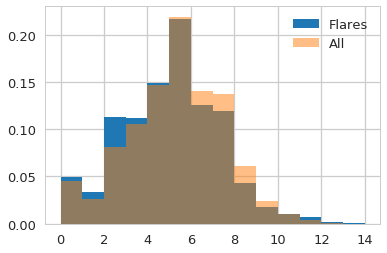

In [45]:
plt.hist(df_gg_stats['Mr_50'] ,density=True, label='Flares', range=(0,14), bins=14)
plt.hist(df_gg_gaiamatch_in['Mr_50'] ,density=True, alpha=.5, label='All', range=(0,14), bins=14)
plt.legend()


In [28]:
def abstolum(M):
    #out put is in ergs / s
    #M = +4.77 - 2.5 log (L / Lsun).
    L = const.L_sun.to(u.erg / u.s) * np.exp((4.77 - M) / 2.5)
    return L.value

In [20]:
#fenergy = df_gg_stats_flares['equivdur'] * abstolum(df_gg_stats_flares['Mr_50'])

In [21]:
#plt.hist(np.log10(fenergy), bins=30)

In [22]:
#fenergy.loc[np.log10(fenergy)>37]

In [23]:
#df_gg_stats_flares.loc[df_gg_stats_flares.index == 42892335]

## understanding large flares

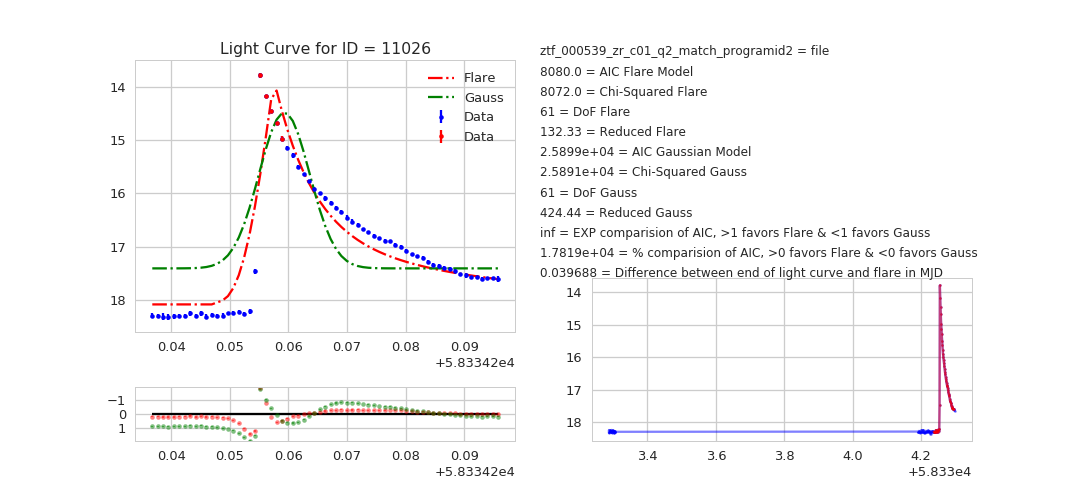

In [11]:
from IPython.display import Image
Image(filename='found_flares_539/ztf_000539_zr_c01_q2_match_programid_id_11026_indx_112_stats.png') 

In [52]:
largef_stats = gaia.loc[(gaia['match_file'] == 'ztf_000539_zr_c01_q2_match_programid') & (gaia['id'] == 11026)]
largef_stats['parallax']

2   NaN
Name: parallax, dtype: float64

In [51]:
largef_stats['ra'].values[0] - largef_stats['ra.1'].values


array([1.093454e-05])

In [106]:
df_gg_gaiamatch_in.columns.values

array(['matchid', 'ra_x', 'dec_x', 'dm_16', 'E_16', 'Mr_16', 'FeH_16',
       'dm_50', 'E_50', 'Mr_50', 'FeH_50', 'dm_84', 'E_84', 'Mr_84',
       'FeH_84', 'gaia_id', 'ra_y', 'dec_y', 'source_id', 'bp_rp',
       'phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'parallax',
       'parallax_error', 'axsdist', 'exploded_unique_matchids_index',
       'unique_matchids_exploded'], dtype=object)

In [53]:
green_large = df_g19_xmatch539.loc[(df_g19_xmatch539['ra'] > largef_stats['ra'].values[0] - 0.001) & 
                                   (df_g19_xmatch539['ra'] < largef_stats['ra'].values[0] + 0.001) &
                                   (df_g19_xmatch539['dec'] > largef_stats['dec'].values[0] - 0.001) & 
                                   (df_g19_xmatch539['dec'] < largef_stats['dec'].values[0] + 0.001)]
green_large

,matchid,ra,dec,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id
7406849,10539012011026,287.489224,9.466742,4.562724,-0.204442,13.45,-0.35,4.787185,-0.093496,13.924999,-0.15,5.037928,0.006643,14.3,0.1,0


In [47]:
abstolum(13.92) * largef_stats['equivdur']

2    2.755226e+36
Name: equivdur, dtype: float64

## Playing with New Match and Stats

In [180]:
df_gaia_stats = pd.merge(df_xmatch, statsid, how='inner', left_on='unique_matchids_exploded', right_on='axs_id')


In [219]:
df_g19_id.head()

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.7,14.036073,1.137076,2.75,-0.45,15.117517,1.239276,3.824185,-0.20,4.260127e+18,280.676054,-1.643882,0.0,1.043532e+13
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4.260127e+18,280.676568,-1.648677,0.0,1.043532e+13
2,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4.260127e+18,280.676568,-1.648677,1.0,1.043532e+13
3,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4.260127e+18,280.676568,-1.648677,0.0,1.043532e+13
4,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4.260127e+18,280.676568,-1.648677,1.0,1.043532e+13


In [217]:
df_g19_stats = pd.merge(df_g19_id, statsid, how='inner', left_on='unique_matchids_exploded', right_on='axs_id')


In [93]:
df_g19_stats = pd.merge(df_g19_xmatch, statsid, how='inner', left_on='matchid', right_on='axs_id')


In [218]:
print(len(df_g19_stats),len(statsid),len(df_g19_xmatch))

10174 49684 102842952


In [95]:
df_g19_gaia_stats = pd.merge(df_g19_stats, df_xmatch, how='inner', left_on='matchid', right_on='matchid')

In [100]:
df_g19_gaia_stats.columns.values

array(['matchid', 'ra_x', 'dec_x', 'dm_16', 'E_16', 'Mr_16', 'FeH_16',
       'dm_50', 'E_50', 'Mr_50', 'FeH_50', 'dm_84', 'E_84', 'Mr_84',
       'FeH_84', 'gaia_id', 'Unnamed: 0', 'match_file', 'id', 'aic_flare',
       'chi_flare', 'dof_flare', 'red_flare', 'aic_gauss', 'chi_gauss',
       'dof_gauss', 'red_gauss', 'exp_comp', 'perc_comp', 'fl_indx',
       'equivdur', 'ra_y', 'dec_y', 'xpos', 'ypos', 'flare_time',
       'end_time', 'flare_end_diff', 'axs_id', 'ra', 'dec', 'source_id',
       'bp_rp', 'phot_g_mean_mag', 'phot_g_mean_flux_over_error',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'a_g_val', 'parallax',
       'parallax_error', 'lum_val', 'axsdist', 'ztf_n_obs',
       'exploded_unique_matchids_index', 'unique_matchids_exploded'],
      dtype=object)

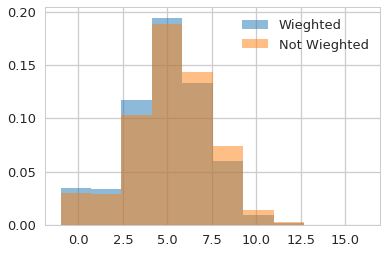

In [122]:
plt.hist(df_gg_gaiamatch_in['Mr_50'], weights=df_gg_gaiamatch_in['ztf_n_obs'], density=True, label='Wieghted', alpha=.5)
plt.hist(df_gg_gaiamatch_in['Mr_50'], density=True, alpha=.5, label='Not Wieghted')
#plt.hist(df_g19_gaia_stats['Mr_50'], density=True, alpha=.3)
plt.legend()

(array([1.70387842e-02, 3.07195598e-02, 1.19395860e-01, 1.99366212e-01,
        1.36496829e-01, 6.60408350e-02, 1.79715643e-02, 7.15131452e-03,
        9.94965499e-04, 6.21853437e-05]),
 array([-0.89999998,  0.77999998,  2.45999994,  4.1399999 ,  5.81999986,
         7.49999982,  9.17999978, 10.85999974, 12.5399997 , 14.21999966,
        15.89999962]),
 <a list of 10 Patch objects>)

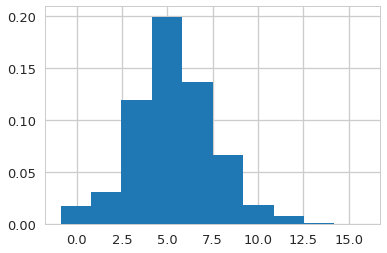

In [111]:
plt.hist(df_g19_gaia_stats['Mr_50'], density=True)

In [ ]:
plt.hexbin(df_gg_gaiamatch_in['Mr_50'], df_gg_gaiamatch_in['ztf_n_obs'])

In [224]:
statsids_xmatch = pd.merge(df_g19_id_sources, statsid, how='inner', left_on='matchid', right_on='axs_id')


In [225]:
statsids_xmatch

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,exploded_unique_matchids_index,unique_matchids_exploded,Unnamed: 0,Unnamed: 0.1,aic_flare,aic_gauss,axs_id,chi_flare,chi_gauss,dec,dof_flare,dof_gauss,end_time,equivdur,exp_comp,fl_indx,flare_end_diff,flare_time,id,match_file,perc_comp,ra,red_flare,red_gauss,xpos,ypos
0,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,0.0,1.059233e+13,20402,NaN,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
1,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,0.0,1.059233e+13,45244,20402.0,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
2,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,1.0,1.059233e+13,20402,NaN,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
3,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,1.0,1.059233e+13,45244,20402.0,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
4,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,2.0,1.163700e+13,20402,NaN,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
5,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,2.0,1.163700e+13,45244,20402.0,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
6,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,3.0,1.163813e+13,20402,NaN,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match_programid,-3.464095,282.124586,0.271512,0.214724,1917.514,1128.243
7,11638132013223,305.668179,20.247519,10.867274,-0.157109,5.900000,-0.650000,11.143183,-0.014973,6.400,-0.45,11.362085,0.095610,6.900000,-0.250000,1.816551e+18,305.668179,20.247519,3.0,1.163813e+13,45244,20402.0,24.562238,21.098143,11638132013223,16.562238,13.098143,23.834885,61,61,58338.320509,42.056879,1.769218e-01,[171 172 173 174 175],0.055914,58338.260706,13223,ztf_000638_zr_c04_q2_match

In [227]:
statsid.loc[statsid['axs_id'] < 11000000000000]

,Unnamed: 0,Unnamed: 0.1,aic_flare,aic_gauss,axs_id,chi_flare,chi_gauss,dec,dof_flare,dof_gauss,end_time,equivdur,exp_comp,fl_indx,flare_end_diff,flare_time,id,match_file,perc_comp,ra,red_flare,red_gauss,xpos,ypos
13,13,NaN,50.814617,39.830364,10436002020711,42.814618,31.830364,-5.153785,67,67,58348.327107,728.333765,4.119074e-03,[103 104 105 106],0.088715,58348.232882,20711,ztf_000436_zr_c01_q1_match_programid,-10.984254,288.034308,0.639024,0.475080,2.979,1734.273
44,44,NaN,51.901442,40.117696,10436012015678,43.901441,32.117696,-4.877325,27,27,58348.327107,172.172576,2.761799e-03,[113 114 115],0.088715,58348.236563,15678,ztf_000436_zr_c01_q2_match_programid,-11.783746,287.166535,1.625979,1.189544,3.201,750.473
45,45,NaN,19.004383,19.466321,10436012028771,11.004383,11.466321,-4.603798,10,10,58347.326678,261.433931,1.259820e+00,[92 93 94],0.001840,58347.323009,28771,ztf_000436_zr_c01_q2_match_programid,0.461938,286.600163,1.100438,1.146632,2018.998,2.059
62,62,NaN,75.808628,69.330909,10436022004289,67.808628,61.330909,-6.359546,27,27,58348.327107,246.929135,3.920859e-02,[14 15 16],0.092384,58348.232882,4289,ztf_000436_zr_c01_q3_match_programid,-6.477719,286.937587,2.511431,2.271515,811.315,2941.389
63,63,NaN,89.077409,60.409919,10436022010211,81.077408,52.409918,-6.377178,25,25,58348.327107,456.221983,5.955710e-07,[86 87 88],0.020683,58348.304595,10211,ztf_000436_zr_c01_q3_match_programid,-28.667490,286.856025,3.243096,2.096397,1104.592,2988.614
64,64,NaN,45.881803,40.977210,10436022020708,37.881804,32.977210,-5.497654,21,21,58347.326678,197.021348,8.609563e-02,[12 13 14],0.101481,58347.223368,20708,ztf_000436_zr_c01_q3_match_programid,-4.904593,286.804186,1.803895,1.570343,1291.108,121.266
65,65,NaN,51.270872,52.533764,10436022020918,43.270872,44.533765,-5.493517,21,21,58347.326678,206.054289,1.880328e+00,[12 13 14],0.101481,58347.223368,20918,ztf_000436_zr_c01_q3_match_programid,1.262893,286.804510,2.060518,2.120655,1289.974,106.558
66,66,NaN,78.359273,77.638419,10436022024986,70.359272,69.638418,-5.476997,21,21,58347.326678,291.003643,6.973787e-01,[12 13 14],0.101481,58347.223368,24986,ztf_000436_zr_c01_q3_match_programid,-0.720853,286.805058,3.350442,3.316115,1288.082,47.815
67,67,NaN,47.004471,48.470155,10436022028187,39.004471,40.470156,-5.502169,20,20,58347.326678,406.237553,2.080987e+00,[12 13 14],0.101481,58347.223368,28187,ztf_000436_zr_c01_q3_match_programid,1.465684,286.806073,1.950224,2.023508,1284.417,137.315
68,68,NaN,57.574605,55.771579,10436022028792,49.574604,47.771577,-5.494027,21,21,58347.326678,409.011995,4.059548e-01,[12 13 14],0.101481,58347.223368,28792,ztf_000436_zr_c01_q3_match_programid,-1.803027,286.803609,2.360695,2.274837,1293.160,108.373


# Making CMD with Green19 and Gaia

In [15]:
greengaia = pd.merge(df_g19_xmatch, df_xmatch, how='inner', on='matchid')

In [16]:
greengaia.head()

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.7,14.036073,1.137076,2.75,-0.45,15.117517,1.239276,3.824185,-0.20,4260126628669270656,280.676054,-1.643882,4260126628669270656,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44,0,10435322156518
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,0,10435322042113
2,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,1,10435321063996
3,10435322142026,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.7,13.720051,1.478382,2.90,-0.40,15.170022,1.584317,3.950000,-0.20,4260126937906960640,280.677176,-1.635635,4260126937906960640,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21,0,10435322142026
4,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.6,11.417916,0.800902,3.35,-0.40,11.788458,0.837992,3.500000,-0.15,4260126933620555136,280.678004,-1.640589,4260126933620555136,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145,0,10435321063851


In [17]:
g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]

In [18]:
def extinction_coef(GBP, GRP, A0, c1, c2, c3, c4, c5, c6, c7):
    k = (c1 + c2*(GBP - GRP) + c3*(GBP - GRP)**2 + c4*(GBP - GRP)**3
         + c5*A0 + c6*A0**2 + c7*(GBP - GRP)*A0)
    return k

In [19]:
def cmd_mags(df):
    g_mag = []
    bp_rp_mag = []
    
    g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    
    for index, row in df.iterrows():
        k_g = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['E_50'],g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7)
        A_g = k_g * row['E_50']
        k_bp = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['E_50'],bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7)
        A_bp = k_bp * row['E_50']
        k_rp = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['E_50'],rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7)
        A_rp = k_rp * row['E_50']
        
        g_mag_value = row['phot_g_mean_mag'] - row['dm_50'] - A_g
        g_mag.append(g_mag_value)
        bp_mag_value = row['phot_bp_mean_mag'] - row['dm_50'] - A_bp
        rp_mag_value = row['phot_rp_mean_mag'] - row['dm_50'] - A_rp
        bp_rp_mag_value = bp_mag_value - rp_mag_value
        bp_rp_mag.append(bp_rp_mag_value)
        
    return g_mag, bp_rp_mag

In [28]:
g_mag, bp_rp_mag = cmd_mags(greengaia)

In [24]:
g_mag, bp_rp_mag

([4.724964639824428,
  6.408188877530047,
  6.408188877530047,
  5.637268714649915,
  4.800845257376018],
 [1.3282391866844954,
  1.6574053061161669,
  1.6574053061161669,
  1.7163793929221285,
  1.4756846118715226])

In [37]:
mag = pd.DataFrame({'g_mag': g_mag, 'bp_rp_mag':bp_rp_mag})


In [ ]:
#mag.to_csv('green_gaia_mag_corrected.csv')

In [38]:
maglim = mag.loc[mag['bp_rp_mag'] > -2]

In [22]:
greengaia.head()

,matchid,ra_x,dec_x,dm_16,E_16,Mr_16,FeH_16,dm_50,E_50,Mr_50,FeH_50,dm_84,E_84,Mr_84,FeH_84,gaia_id,ra_y,dec_y,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_mag,a_g_val,parallax,parallax_error,lum_val,axsdist,ztf_n_obs,exploded_unique_matchids_index,unique_matchids_exploded
0,10435322156518,280.676054,-1.643882,12.614978,1.050425,1.875815,-0.7,14.036073,1.137076,2.75,-0.45,15.117517,1.239276,3.824185,-0.20,4260126628669270656,280.676054,-1.643882,4260126628669270656,1.802952,19.529078,182.307449,19.999294,18.196342,NaN,-0.095662,0.409760,NaN,4.600729e-07,44,0,10435322156518
1,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,0,10435322042113
2,10435322042113,280.676568,-1.648677,11.017821,1.039677,2.925815,-0.6,11.827391,1.164479,4.10,-0.35,13.269290,1.274188,5.374185,-0.15,4260126624385214080,280.676568,-1.648677,4260126624385214080,2.158577,18.975090,276.302887,19.907875,17.749298,NaN,0.779127,0.266000,NaN,6.010644e-07,95,1,10435321063996
3,10435322142026,280.677176,-1.635635,12.414134,1.378543,1.800000,-0.7,13.720051,1.478382,2.90,-0.40,15.170022,1.584317,3.950000,-0.20,4260126937906960640,280.677176,-1.635635,4260126937906960640,2.379248,20.254824,113.621567,20.957420,18.578173,NaN,-0.494582,0.742402,NaN,5.310926e-07,21,0,10435322142026
4,10435322041693,280.678004,-1.640589,11.177934,0.742131,3.100000,-0.6,11.417916,0.800902,3.35,-0.40,11.788458,0.837992,3.500000,-0.15,4260126933620555136,280.678004,-1.640589,4260126933620555136,1.812119,16.765156,876.244080,17.633398,15.821280,NaN,0.488192,0.077859,NaN,6.276367e-07,145,0,10435321063851


In [25]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

(15, -2.5)

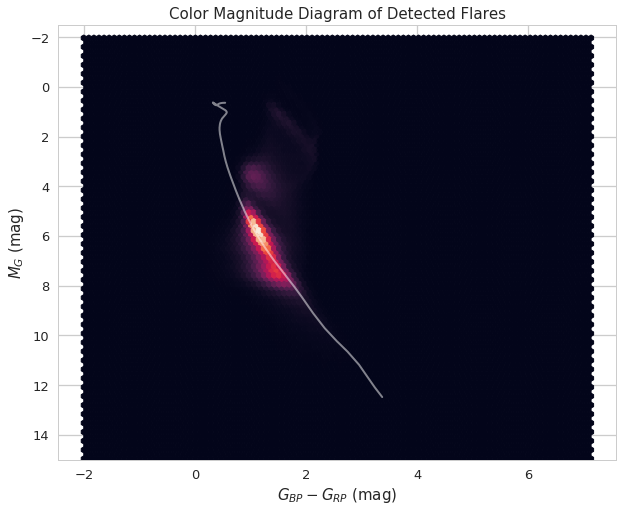

In [50]:
#And then you can call it like this:
#LL = LUM(gaia_ext['phot_g_mean_flux'].values, gaia_ext['parallax'].values)

#And use it like this:
fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='white', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')

#plt.ylim(15,4.5)


#plt.scatter(gaia_ext['bp_rp'], gaia_ext['phot_g_mean_mag'] - 5. * np.log10(1000./gaia_ext[u'parallax']) + 5, 
#            alpha=0.75, s=30, edgecolors='black', label='Before Extinction Correction', marker='*')
plt.hexbin(maglim['bp_rp_mag'], maglim['g_mag'])
plt.ylabel('$M_G$ (mag)', size=15)

plt.ylim(15,-2.5)
#plt.xlim(-5,10)

#plt.legend()
#fig.savefig('CMD_extinction_correction.png')

(15, -2.5)

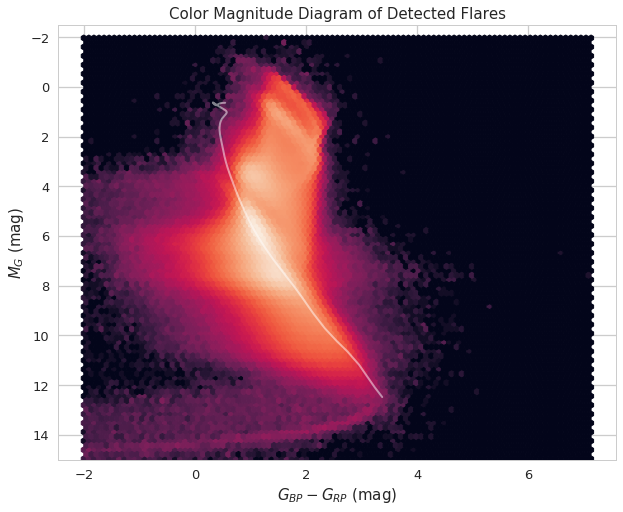

In [49]:
#And then you can call it like this:
#LL = LUM(gaia_ext['phot_g_mean_flux'].values, gaia_ext['parallax'].values)

#And use it like this:
fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='white', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')

#plt.ylim(15,4.5)


#plt.scatter(gaia_ext['bp_rp'], gaia_ext['phot_g_mean_mag'] - 5. * np.log10(1000./gaia_ext[u'parallax']) + 5, 
#            alpha=0.75, s=30, edgecolors='black', label='Before Extinction Correction', marker='*')
plt.hexbin(maglim['bp_rp_mag'], maglim['g_mag'], bins='log')
plt.ylabel('$M_G$ (mag)', size=15)

plt.ylim(15,-2.5)
#plt.xlim(-5,10)

#plt.legend()
#fig.savefig('CMD_extinction_correction.png')

(22, -2.5)

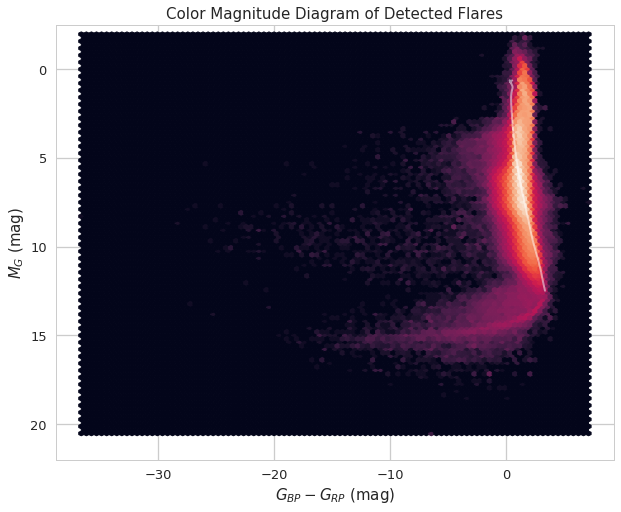

In [48]:
#And then you can call it like this:
#LL = LUM(gaia_ext['phot_g_mean_flux'].values, gaia_ext['parallax'].values)

#And use it like this:
fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='white', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')

#plt.ylim(15,4.5)


#plt.scatter(gaia_ext['bp_rp'], gaia_ext['phot_g_mean_mag'] - 5. * np.log10(1000./gaia_ext[u'parallax']) + 5, 
#            alpha=0.75, s=30, edgecolors='black', label='Before Extinction Correction', marker='*')
plt.hexbin(mag['bp_rp_mag'], mag['g_mag'], bins='log')
plt.ylabel('$M_G$ (mag)', size=15)

plt.ylim(22,-2.5)
#plt.xlim(-5,10)

#plt.legend()
#fig.savefig('CMD_extinction_correction.png')

In [43]:
max(bp_rp_mag)

7.131744286050696

/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.000000e+00, 2.000000e+00, 1.900000e+01, 6.200000e+01,
        2.100000e+02, 6.440000e+02, 2.196000e+03, 1.221900e+04,
        8.586867e+07, 9.587100e+04]),
 array([-36.65446919, -32.27584784, -27.89722649, -23.51860514,
        -19.1399838 , -14.76136245, -10.3827411 ,  -6.00411976,
         -1.62549841,   2.75312294,   7.13174429]),
 <a list of 10 Patch objects>)

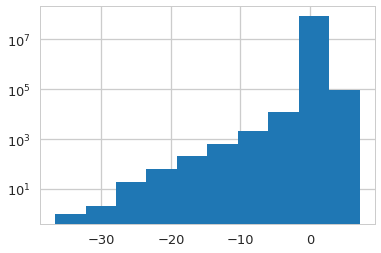

In [35]:
plt.hist(bp_rp_mag, log=True)

/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.1329600e+05, 4.2180100e+06, 1.4800699e+07, 4.1606020e+07,
        2.3034308e+07, 2.1212550e+06, 6.7304000e+04, 1.8450000e+04,
        5.4000000e+02, 1.2000000e+01]),
 array([-1.96949756,  0.27943354,  2.52836465,  4.77729575,  7.02622685,
         9.27515796, 11.52408906, 13.77302016, 16.02195127, 18.27088237,
        20.51981347]),
 <a list of 10 Patch objects>)

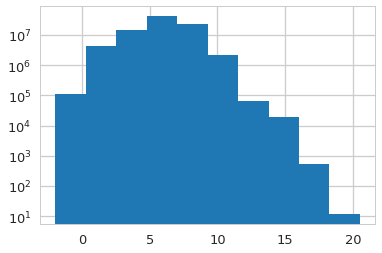

In [47]:
plt.hist(g_mag, log=True)